In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [27]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
print(image.shape)

(540, 960, 3)


In [28]:
y_size = image.shape[0]
x_size = image.shape[1]

print(x_size,y_size)

region_select = np.copy(image)

960 540


In [29]:
# define the region of interest
left_bottom = [0, 539]
right_bottom = [x_size, y_size]
apex = [x_size/2, y_size/2]

In [30]:
# fit lines to the region points

fit_left = np.polyfit( (left_bottom[0], apex[0]), (left_bottom[1], apex[1]),  1)
fit_right = np.polyfit( (right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit( (left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print(fit_left, fit_right, fit_bottom)

[  -0.56041667  539.        ] [  5.62500000e-01   1.43257339e-13] [  1.04166667e-03   5.39000000e+02]


In [31]:
# find the region inside the lines

XX, YY = np.meshgrid( np.arange(0, x_size), np.arange(0, y_size) )

In [32]:
region_thresholds = (YY > (XX * fit_left[0]   + fit_left[1])) & \
                    (YY > (XX * fit_right[0]  + fit_right[1])) & \
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))

print(region_thresholds)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False  True ..., False False False]
 [False  True  True ...,  True  True False]]


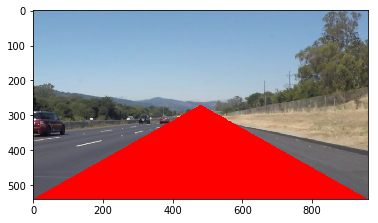

In [33]:
region_select[region_thresholds] = [255, 0, 0]

plt.imshow(region_select)
plt.show()